In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json
import h5py

In [3]:
data = {}
paramsNameList = []

batchNames = ['v6_batch0'] #

batchName = 'v6_batch0'  #
paramsName  = 'Spontaneous'
paramsNameList.append(paramsName)

data[paramsName] = {}

['Spontaneous']

In [175]:
# hf = h5py.File('RasterPlot.h5', 'r')
# spkid = np.array(hf.get('spkid'))
# spkt = np.array(hf.get('spkt'))
# hf.close()

In [209]:
# hf = h5py.File('Voltage_soma.h5', 'r')
# cellVNumber = []
# for cellName in list(hf.keys()):
#     cellVNumber.append(int(cellName.split('_')[1]))
# cellVNumber = np.sort(cellVNumber)    
# Vt = np.array(hf.get(cellName))
# hf.close()

In [211]:
# S1 Cells
# Load 55 Morphological Names and Cell pop numbers -> L1:6 L23:10 L4:12 L5:13 L6:14
# Load 207 Morpho-electrical Names used to import the cells from 'cell_data/' -> L1:14 L23:43 L4:46 L5:52 L6:52
# Create [Morphological,Electrical] = number of cell metype in the sub-pop

with open('../../info/anatomy/S1-cells-distributions-Rat.txt') as mtype_file:
    mtype_content = mtype_file.read()       

popNumber = {}
cellNumber = {} 
popLabel = {} 
popParam = []
cellParam = []
meParamLabels = {} 
popLabelEl = {} 
cellLabel = {}

for line in mtype_content.split('\n')[:-1]:
    cellname, mtype, etype, n, m = line.split()
    metype = mtype + '_' + etype[0:3]
    cellNumber[metype] = int(n)
    popLabel[metype] = mtype
    popNumber[mtype] = int(m)
    cellLabel[metype] = cellname

    if mtype not in popParam:
        popParam.append(mtype)
        popLabelEl[mtype] = [] 
               
    popLabelEl[mtype].append(metype)
    
    cellParam.append(mtype + '_' + etype[0:3])
    
S1pops = popParam[0:55]
S1cells = cellParam[0:207]

#------------------------------------------------------------------------------  
# Thalamic Cells

thalamicpops = ['ss_RTN_o', 'ss_RTN_m', 'ss_RTN_i', 'VPL_sTC', 'VPM_sTC', 'POm_sTC_s1']

cellNumber['ss_RTN_o'] = int(382 * (210**2/150**2)) # from mouse model (d = 150 um)
cellNumber['ss_RTN_m'] = int(382 * (210**2/150**2))
cellNumber['ss_RTN_i'] = int(765 * (210**2/150**2))
cellNumber['VPL_sTC'] = int(656 * (210**2/150**2))
cellNumber['VPM_sTC'] = int(839 * (210**2/150**2))
cellNumber['POm_sTC_s1'] = int(685 * (210**2/150**2))

for mtype in thalamicpops: # No diversity
	metype = mtype
	popParam.append(mtype)
	popLabel[metype] = mtype
	cellParam.append(metype)

	popNumber[mtype] = cellNumber[metype]

	popLabelEl[mtype] = [] 
	popLabelEl[mtype].append(metype)

#------------------------------------------------------------------------------  
popParamLabels = popParam
cellParamLabels = cellParam

In [58]:
popNumber = np.linspace(1, 55, 55)
popParamLabels = list(data[paramsName]['simData']['popRates'])
Epops = ['L23_PC', 'L4_PC', 'L4_SS', 'L4_SP', 
             'L5_TTPC1', 'L5_TTPC2', 'L5_STPC', 'L5_UTPC',
             'L6_TPC_L1', 'L6_TPC_L4', 'L6_BPC', 'L6_IPC', 'L6_UTPC']

thalamicpops = ['ss_RTN_o', 'ss_RTN_m', 'ss_RTN_i', 'VPL_sTC', 'VPM_sTC', 'POm_sTC_s1']

Ipops = []
for popName in popParam:
    if popName not in Epops and popName not in thalamicpops:
        Ipops.append(popName)

In [7]:
#--------------------------------------------------------------------------
# Recording 
#--------------------------------------------------------------------------
allpops = cellParamLabels
cellsrec = 2
if cellsrec == 0:  recordCells = allpops # record all cells
elif cellsrec == 1: recordCells = [(pop,0) for pop in allpops] # record one cell of each pop
elif cellsrec == 2: # record one cell of each cellMEtype # need more test!!!
    recordCells = []
    for metype in cellParamLabels:
        if cellNumber[metype] < 5:
            for numberME in range(cellNumber[metype]):
                recordCells.append((metype,numberME))
        else:
            numberME = 0
            diference = cellNumber[metype] - 5.0*int(cellNumber[metype]/5.0)
            
            for number in range(5):            
                recordCells.append((metype,numberME))
                
                if number < diference:              
                    numberME+=int(np.ceil(cellNumber[metype]/5.0))  
                else:
                    numberME+=int(cellNumber[metype]/5.0)

In [8]:
cellVNumber = []
for cellName in data[paramsName]['simData']['V_soma'].keys():
    cellVNumber.append(int(cellName.split('_')[1]))

cellVNumber = np.sort(cellVNumber)

In [9]:
paramsNameList

['Spontaneous']

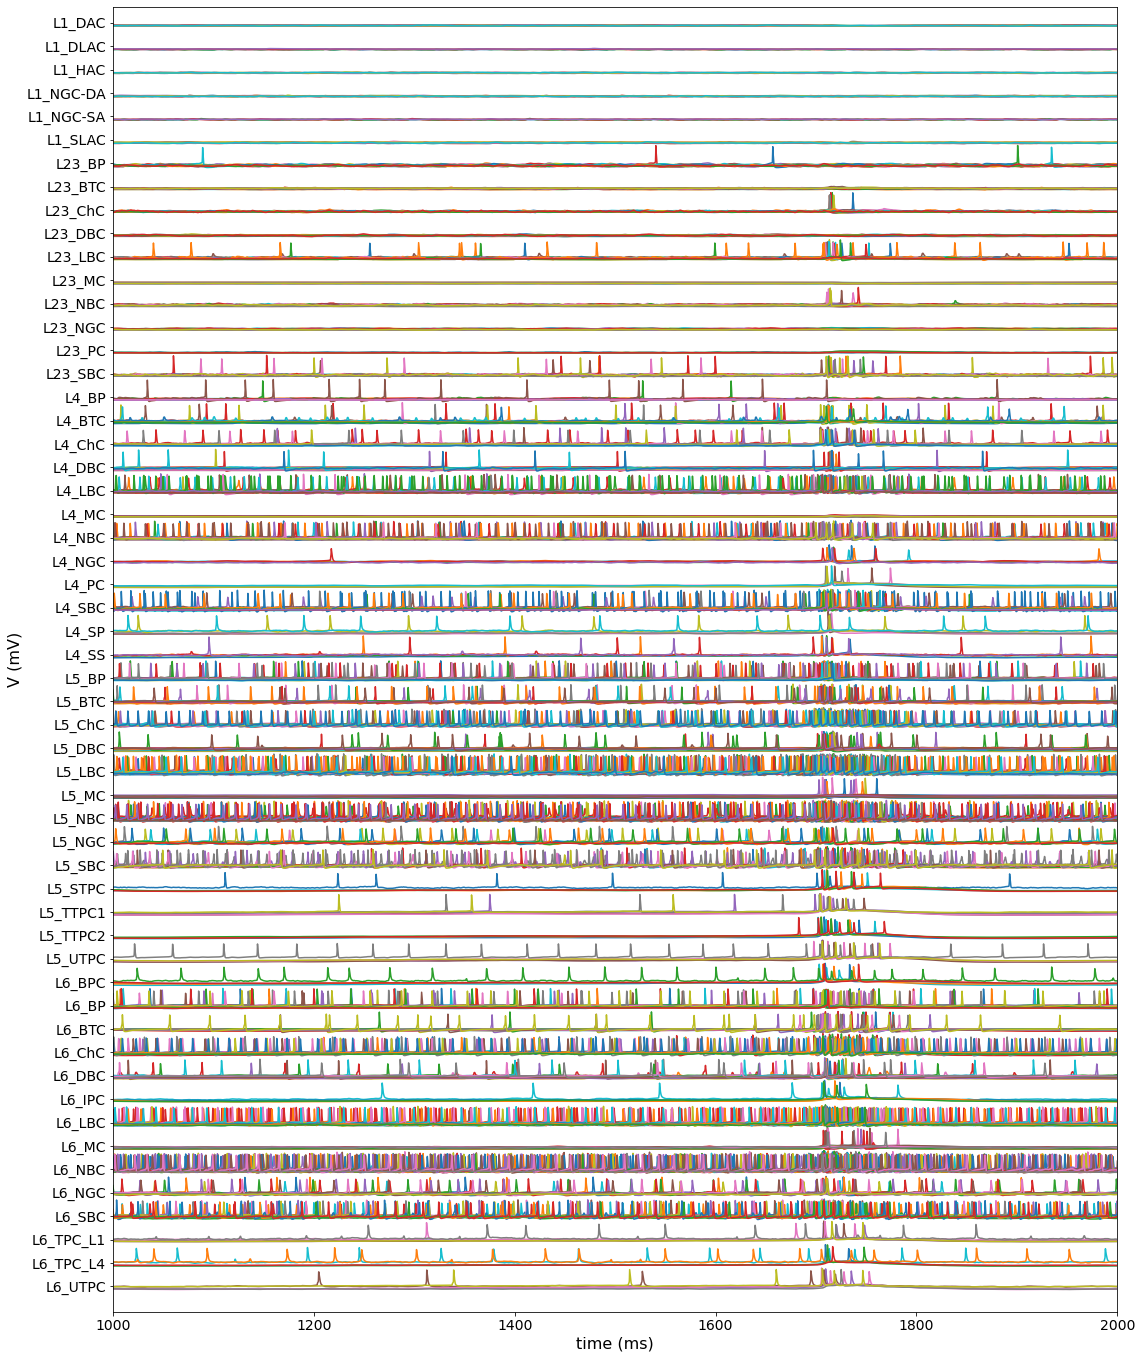

In [22]:
plt.figure(figsize=(18,24)) 
time = np.linspace(0, 5000, 50000)
plt.ylabel('V (mV)', fontsize=16)
plt.xlabel('time (ms)', fontsize=16)
plt.xlim(1000, 2000)
# plt.ylim(-80, -30)
plt.ylim(-7390+6*120,20)
popinvert = popParam[::-1]
plt.yticks(np.arange(-7260+6*120,60,120),popinvert[6:61], fontsize=14)
plt.xticks(fontsize=14)

paramsName = paramsNameList[0]
number = 0
for i,popName in enumerate(popParam[0:55]):   
    for metype in popLabelEl[popName]:
        
        if cellNumber[metype] < 5:
            numberME = cellNumber[metype]
        else:
            numberME = 5
            
        for j in range(numberME):    
            Vt = np.array(data[paramsName]['simData']['V_soma']['cell_'+str(cellVNumber[number])])
            plt.plot(time, (Vt-i*120.0)) 
            number = number + 1

plt.savefig('Vt_after-transient_' + paramsName + '.png', facecolor = 'white', bbox_inches='tight' , dpi=300)

In [97]:
np.sum(popID3)

38612

In [98]:
popID2 = []
popID3 = []
N = 0
for mtype in popNumber.keys():
    popID[mtype] = N
    popID2.append(N)
    N += popNumber[mtype]
    popID3.append(popNumber[mtype])
popID2.append(N)

In [99]:
# L1:6 L23:10 L4:12 L5:13 L6:14
np.sum(popID3[41:55])

12714

In [100]:
popID = {}
N = 0
for mtype in popNumber.keys():
    popID[mtype] = N
    N += popNumber[mtype]
    

spkid = list(data[paramsName]['simData']['spkid'])
spkt = list(data[paramsName]['simData']['spkt'])
print('N =',N,', Number of spikes =',np.size(spkt),', FR =',np.size(spkt)/(5.0*N))

#after transient
mtype = 'L23_PC'
popRates = []
popNames = []
for mtype in popParamLabels:
    popName = mtype
    FRafter = []
    for i in range(np.size(spkt)):
        if spkid[i] >= popID[mtype] and spkid[i] < popID[mtype]+popNumber[mtype] and spkt[i] > 500.0:
    #         print('%.3f %.0f' % (spkt[i],spkid[i]))
            FRafter.append(spkt[i])
         
    popRates.append(np.size(FRafter)/(4.5*(popNumber[mtype])))
    popNames.append(mtype)
    for metype in popLabelEl[mtype]:        
        print('%s (%d cells)\t %.3f\t %.3f\t'% (metype,popNumber[mtype],np.size(FRafter)/(4.5*(popNumber[mtype])),data[paramsName]['simData']['popRates'][metype]))

N = 38612 , Number of spikes = 958361 , FR = 4.964057805863463
L1_DAC_bNA (58 cells)	 0.000	 0.000	
L1_DAC_cNA (58 cells)	 0.000	 0.000	
L1_DLAC_cNA (24 cells)	 0.000	 0.000	
L1_HAC_bNA (91 cells)	 0.000	 0.000	
L1_HAC_cIR (91 cells)	 0.000	 0.000	
L1_HAC_cNA (91 cells)	 0.000	 0.000	
L1_NGC-DA_bNA (72 cells)	 0.000	 0.000	
L1_NGC-DA_cAC (72 cells)	 0.000	 0.000	
L1_NGC-DA_cNA (72 cells)	 0.000	 0.000	
L1_NGC-DA_cST (72 cells)	 0.000	 0.000	
L1_NGC-SA_cNA (52 cells)	 0.000	 0.000	
L1_SLAC_bNA (41 cells)	 0.000	 0.014	
L1_SLAC_cAC (41 cells)	 0.000	 0.000	
L1_SLAC_cNA (41 cells)	 0.000	 0.000	
L23_BP_bAC (28 cells)	 0.254	 0.067	
L23_BP_bIR (28 cells)	 0.254	 0.000	
L23_BP_bNA (28 cells)	 0.254	 0.143	
L23_BP_cAC (28 cells)	 0.254	 0.486	
L23_BP_cNA (28 cells)	 0.254	 0.650	
L23_BP_dST (28 cells)	 0.254	 0.000	
L23_BTC_bAC (104 cells)	 0.043	 0.173	
L23_BTC_bIR (104 cells)	 0.043	 0.000	
L23_BTC_bNA (104 cells)	 0.043	 0.261	
L23_BTC_cAC (104 cells)	 0.043	 0.000	
L23_BTC_cNA (104 cells

In [101]:
popRates2 = popRates
popNames2 = popNames

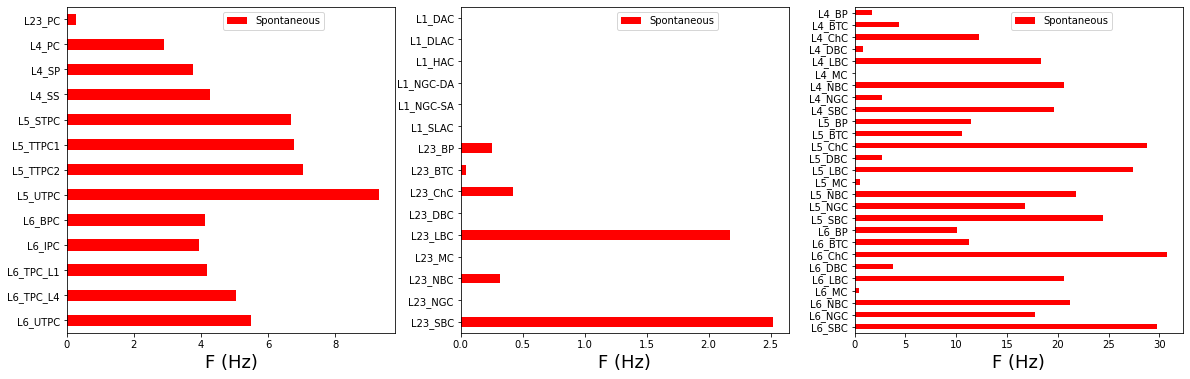

In [102]:
plt.figure(figsize=(20,6))
widths = 0.45
plt.subplot(1, 3, 1) 

popRates = []
popNames = []
for number,popName in enumerate(popNames2):
    if popName in Epops:
        popRates.append(popRates2[number])
        popNames.append(popName)
        
ind = np.arange(len(popNames))
plt.barh(ind,popRates, widths, color='red', label=paramsName) 

plt.ylim(12.5,-0.5)
plt.xlabel('F (Hz)', fontsize=18)
plt.yticks(ind, popNames, fontsize=10)
plt.legend(loc='upper right', bbox_to_anchor=(0.8, 1.0))
#----------------------------------------------------------------------------------
plt.subplot(1, 3, 2)  

popRates = []
popNames = []
for number,popName in enumerate(popNames2):
    if popName in Ipops[0:15]:
        popRates.append(popRates2[number])
        popNames.append(popName)
        
ind = np.arange(len(popNames))
plt.barh(ind,popRates, widths, color='red', label=paramsName) 

plt.ylim(14.5,-0.5)
plt.xlabel('F (Hz)', fontsize=18)
plt.yticks(ind, popNames, fontsize=10)
plt.legend(loc='upper right', bbox_to_anchor=(0.8, 1.0))
#----------------------------------------------------------------------------------
plt.subplot(1, 3, 3)   

popRates = []
popNames = []
for number,popName in enumerate(popNames2):
    if popName in Ipops[15:]:
        popRates.append(popRates2[number])
        popNames.append(popName)
        
ind = np.arange(len(popNames))
plt.barh(ind,popRates, widths, color='red', label=paramsName) 

plt.ylim(26.5,-0.5)
plt.xlabel('F (Hz)', fontsize=18)
plt.yticks(ind, popNames, fontsize=10)
plt.legend(loc='upper right', bbox_to_anchor=(0.8, 1.0))

namefig = '2.png'
plt.savefig(namefig, facecolor = 'white', bbox_inches='tight' , dpi=300)